In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
'''
1. Retrieve and load the Olivetti faces dataset
'''
faces = fetch_olivetti_faces()
dir(faces)

['DESCR', 'data', 'images', 'target']

In [ ]:
X = faces.data
y = faces.target
X.shape, y.shape

((400, 4096), (400,))

In [ ]:
min_value = np.min(X)
max_value = np.max(X)
print(min_value, max_value)

0.0 1.0


In [ ]:
face_index = np.unique(y, return_index=True)[1]
face_index

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390])

In [ ]:
unique_faces = X[face_index]

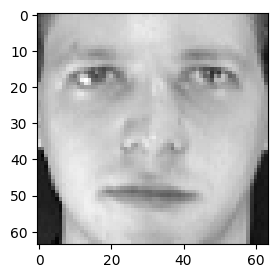

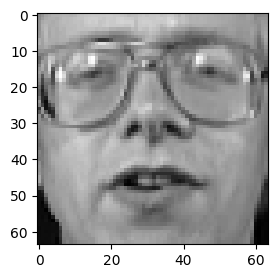

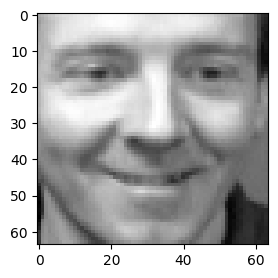

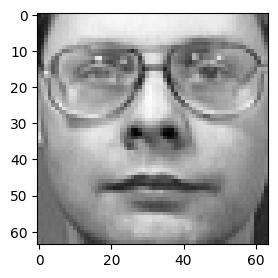

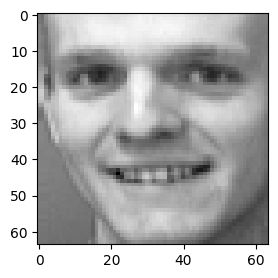

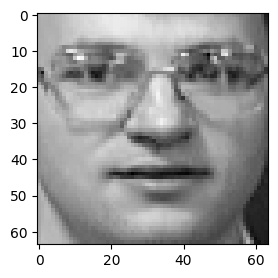

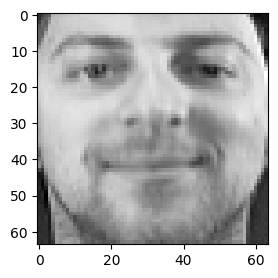

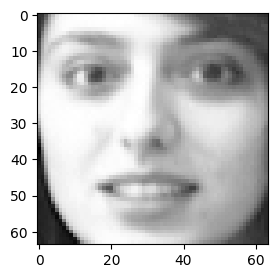

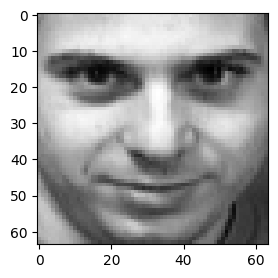

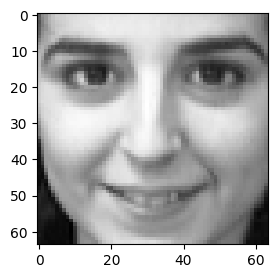

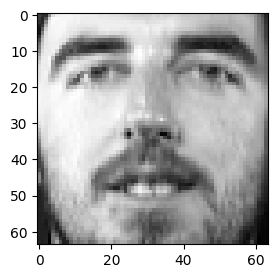

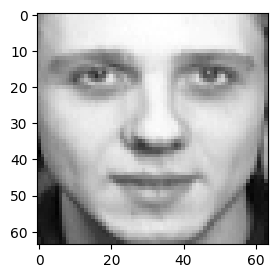

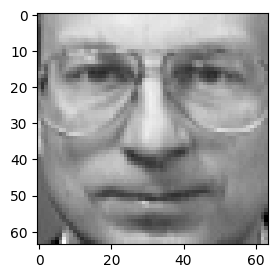

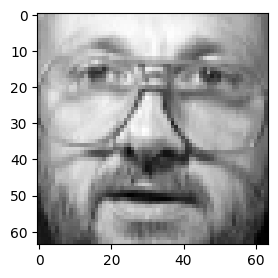

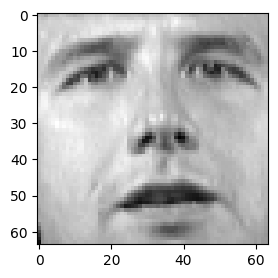

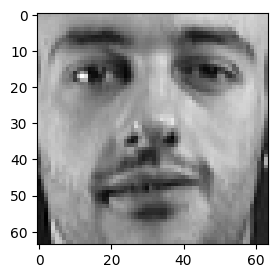

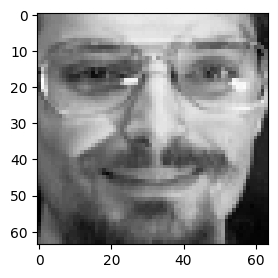

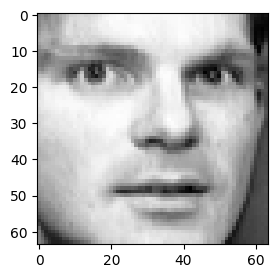

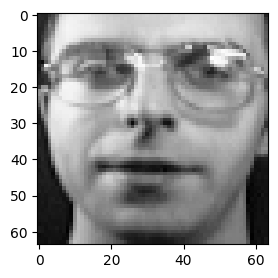

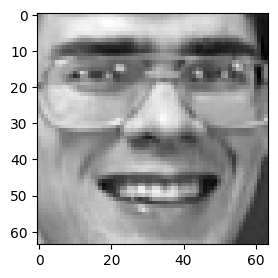

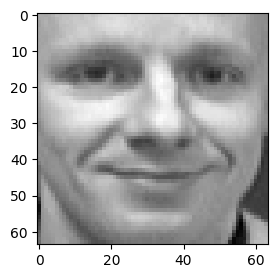

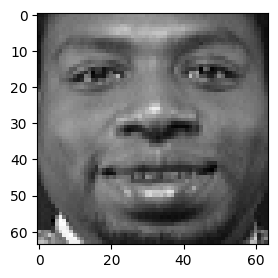

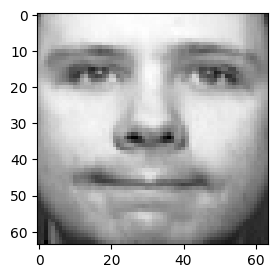

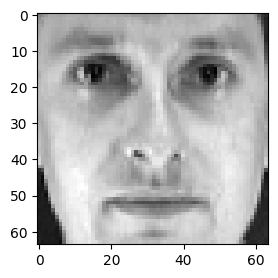

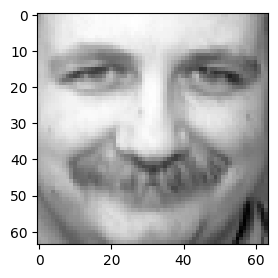

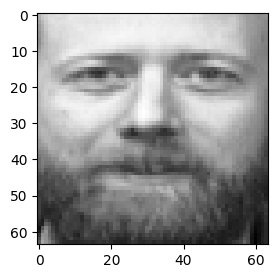

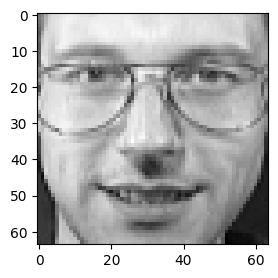

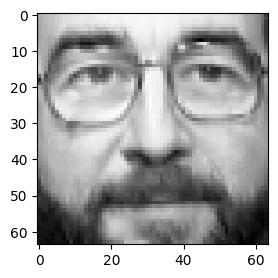

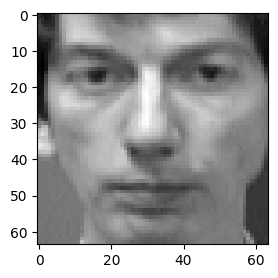

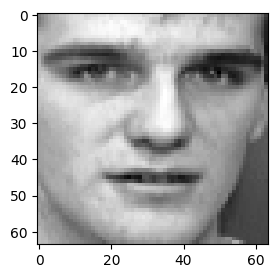

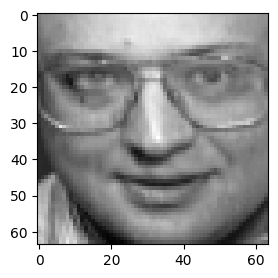

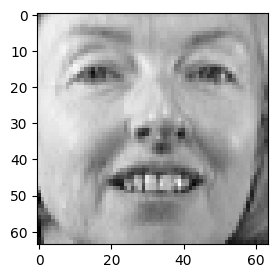

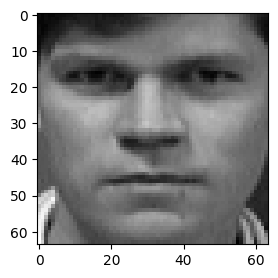

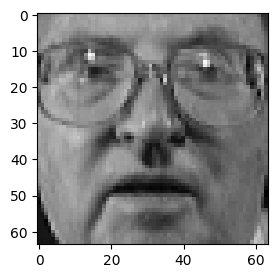

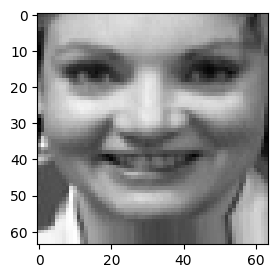

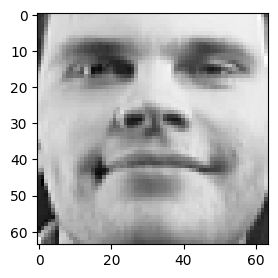

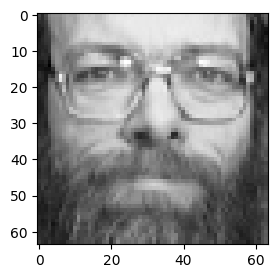

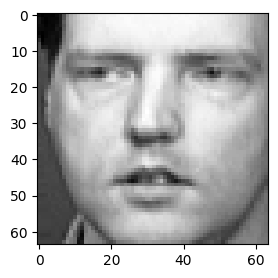

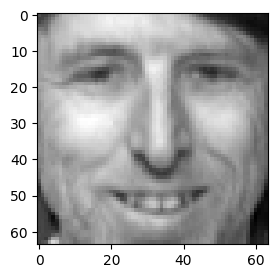

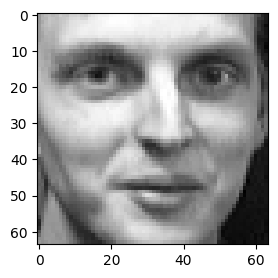

In [ ]:
for i in range(40):
  plt.figure(figsize=(3,3))
  face_img = unique_faces[i].reshape(64, 64)
  plt.imshow(face_img, cmap='gray')
  plt.show()

In [ ]:
'''
2. Split the training set, a validation set,
    and a test set using stratified sampling to ensure that
    there are the same number of images per person in each set.
    Provide your rationale for the split ratio.
'''
train_indices = []
val_indices = []
test_indices = []

for index in face_index:
  person_indices = np.arange(index, index + 10)

  np.random.shuffle(person_indices)

  train_indices.extend(person_indices[:6])
  val_indices.extend(person_indices[6:8])
  test_indices.extend(person_indices[8:])

train_indices = np.array(train_indices)
val_indices = np.array(val_indices)
test_indices = np.array(test_indices)

X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]
X_test, y_test = X[test_indices], y[test_indices]

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_val, return_counts=True))
print(np.unique(y_val, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))


Provide your rationale for the split ratio

- The Olivetti faces dataset contains 400 images, with 10 images for each of the 40 individuals. To ensure that each subset (training, validation, and test) remains representative of the entire dataset, I chose a 60%/20%/20% split. This approach allocates 240 images (6 per person) to the training set, which is ample for the model to capture a variety of facial features across different individuals. The validation and test sets, each with 80 images (2 per person), are large enough to provide meaningful feedback during model tuning and final evaluation while ensuring that every person is consistently represented across all subsets. This split balances the need for effective model training with robust validation and testing, supporting a well-rounded evaluation of the model’s generalization capabilities.

In [ ]:
'''
3. Using k-fold cross validation,
    train a classifier to predict which person is represented in each picture,
    and evaluate it on the validation set.
'''
classifier = LogisticRegression(max_iter=5000, random_state=21)
kfold = KFold(n_splits=3, shuffle=True, random_state=21)

cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=kfold)
print(cross_val_scores)
print(np.mean(cross_val_scores))

[0.8375 0.9375 0.825 ]
0.8666666666666666


In [ ]:
classifier.fit(X_train, y_train)
validation_accuracy = classifier.score(X_val, y_val)
print(validation_accuracy)

0.9625


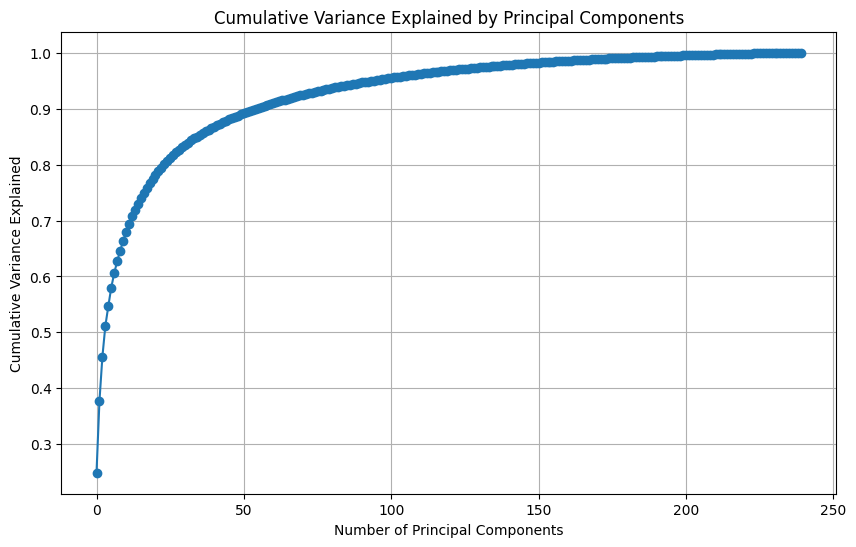

In [ ]:
'''
4. Use K-Means to reduce the dimensionality of the set.
    Provide your rationale for the similarity measure used to perform the clustering.
    Use the silhouette score approach to choose the number of clusters.
'''
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [ ]:
n_components = np.argmax(cumulative_variance >= 0.99) + 1
n_components

177

In [ ]:
k_range = range(2, 200)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=21)
    cluster_labels = kmeans.fit_predict(X_train)

    sil_score = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(sil_score)

In [ ]:
optimal_k = k_range[np.argmax(silhouette_scores)]
optimal_k

112

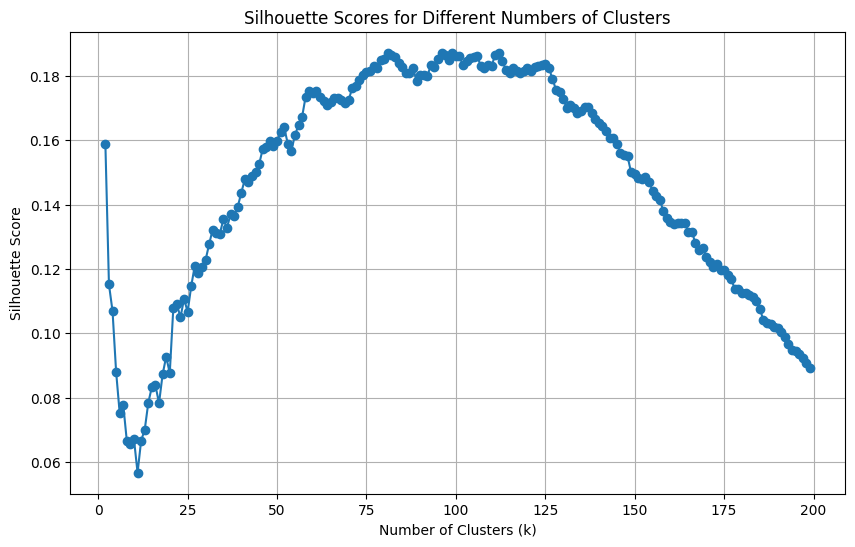

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Provide your rationale for the similarity measure used to perform the clustering.

- After applying Principal Component Analysis (PCA) to reduce the dataset to 177 dimensions while retaining 99% of the variance, I explored different values of
K for K-Means clustering, focusing on numbers smaller than 177. This choice was driven by the understanding that the number of clusters should typically be fewer than the dimensions, as each cluster represents a distinct grouping within the feature space. By evaluating the silhouette score across these values, I identified K=112 as the optimal number of clusters, as it provided the best balance between intra-cluster cohesion and inter-cluster separation in the reduced feature space. This approach ensured that the clustering was both computationally efficient and meaningful.


In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=21)
X_train_reduced = kmeans.fit_transform(X_train)
X_val_reduced = kmeans.transform(X_val)
X_test_reduced = kmeans.transform(X_test)

In [ ]:
'''
5. Use the set from step (4) to train a classifier as in step (3)
'''
classifier_reduced = LogisticRegression(max_iter=5000, random_state=21)
kfold_reduced = KFold(n_splits=3, shuffle=True, random_state=21)
cross_val_scores_reduced = cross_val_score(classifier_reduced, X_train_reduced, y_train, cv=kfold_reduced)
print(cross_val_scores_reduced)
print(np.mean(cross_val_scores_reduced))

[0.8   0.875 0.8  ]
0.8250000000000001


In [ ]:
classifier_reduced.fit(X_train_reduced, y_train)

LogisticRegression(max_iter=5000, random_state=21)

In [ ]:
validation_accuracy_reduced = classifier_reduced.score(X_val_reduced, y_val)
validation_accuracy_reduced

0.8625

In [ ]:
'''
6. Apply DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to the Olivetti Faces dataset for clustering.
    Preprocess the images and convert them into feature vectors, then use DBSCAN to group similar images together based on their density.
    Provide your rationale for the similarity measure used to perform the clustering, considering the nature of facial image data.
'''
dbscan = DBSCAN(eps=8, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_train)

print(np.unique(dbscan_labels))
print(len(dbscan_labels))
print("Noise", list(dbscan_labels).count(-1))

[-1  0  1  2  3  4  5  6  7]
240
Noise 71


Provide your rationale for the similarity measure used to perform the clustering, considering the nature of facial image data.

- The dataset was already preprocessed into 4096-dimensional feature vectors with normalized pixel values, so no further preprocessing was needed. I experimented with different eps values, initially starting small, but this resulted in too many noise points. By gradually increasing eps, I found that an eps value of 8 allowed the algorithm to form meaningful clusters while reducing noise significantly. I selected Euclidean distance as the similarity measure because it effectively captures differences and similarities between image vectors in high-dimensional space, making it suitable for this clustering task.

In [ ]:
print(np.max(X_train), np.min(X_train))
print(X_train.shape)

0.9834711 0.004132231
(240, 4096)
